## Task 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
  
# Read the CSV file.
data = pd.read_csv("CTG.csv", skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [2]:
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
658,130.0,1.0,0.0,3.0,0.0,0.0,0.0,24.0,1.2,12.0,...,35.0,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0
1734,134.0,9.0,1.0,8.0,5.0,0.0,0.0,59.0,1.2,0.0,...,109.0,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0
1226,125.0,1.0,0.0,4.0,0.0,0.0,0.0,43.0,0.7,31.0,...,21.0,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0
1808,143.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,0.3,6.0,...,27.0,132.0,159.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0
825,152.0,0.0,0.0,4.0,0.0,0.0,0.0,62.0,0.4,59.0,...,25.0,136.0,161.0,0.0,0.0,159.0,156.0,158.0,1.0,1.0


In [3]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

clf = DummyClassifier(strategy='most_frequent')
cross_val_score(clf, Xtrain, Ytrain)

C:\Users\sildn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.77992958, 0.77954145, 0.78230088])

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from statistics import mean
results = []
decision_clf = DecisionTreeClassifier()
random_forest_clf = RandomForestClassifier()
grad_boost_clf = GradientBoostingClassifier()
perceptron_clf = Perceptron()
log_reg_clf = LogisticRegression()
linear_svc_clf = LinearSVC()

results.append(cross_val_score(decision_clf, Xtrain, Ytrain))
results.append(cross_val_score(random_forest_clf, Xtrain, Ytrain))
results.append(cross_val_score(grad_boost_clf, Xtrain, Ytrain))
results.append(cross_val_score(perceptron_clf, Xtrain, Ytrain))
results.append(cross_val_score(log_reg_clf, Xtrain, Ytrain))
results.append(cross_val_score(linear_svc_clf, Xtrain, Ytrain))
results_avg = []
for classifier in results:
    results_avg.append(mean(classifier))
print(results_avg.index(max(results_avg)))

C:\Users\sildn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sildn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sildn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sildn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sildn\Anaconda3\lib\sit

2


In [5]:
from sklearn.neural_network import MLPClassifier
neural_clf = MLPClassifier(learning_rate="adaptive")
print(mean(cross_val_score(neural_clf, Xtrain, Ytrain)))

C:\Users\sildn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8829887991776728


Based on the results we found that the best classifier while using default hyperparameters
 was the Gradient Boosting classifier.

In [6]:
from sklearn.metrics import accuracy_score

clf = grad_boost_clf
clf.fit(Xtrain, Ytrain)
Yguess = clf.predict(Xtest)
print("The accuracy score of the gradient boosting classifier is "+"{0:.3f}".format(accuracy_score(Ytest, Yguess)))

The accuracy score of the gradient boosting classifier is 0.930


## Task 2

In [7]:
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

In [43]:
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        graph.node(node_id, str(self.value), style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False
class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id
        
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth

    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be 
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            #print(Y)
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass
from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        XY = sorted(zip(X[:, feature], Y))

        n = len(XY)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = XY[i][0]
            y_i = XY[i][1]

            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            x_next = XY[i+1][0]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(XY[max_i][0] + XY[max_i+1][0])
        return score, feature, split_point

In [9]:
depth_cross = []
for depth in range(25):
    cls = TreeClassifier(max_depth=depth)
    depth_cross.append(mean(cross_val_score(cls, Xtrain, Ytrain)))
print(depth_cross.index(max(depth_cross)))

C:\Users\sildn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sildn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sildn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sildn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

13


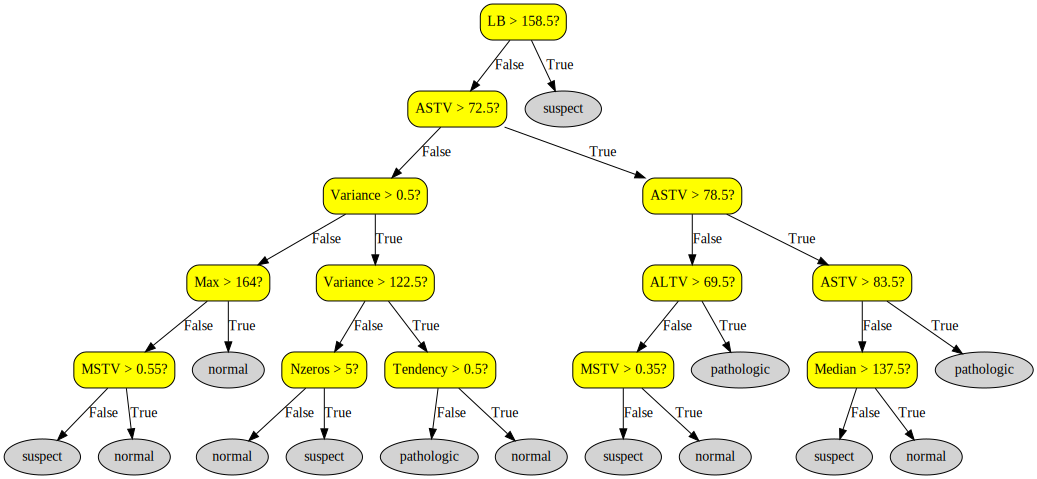

In [10]:
cls = TreeClassifier(max_depth=13)
clf.fit(Xtrain, Ytrain)
Yguess = clf.predict(Xtest)
acc = accuracy_score(Ytest, Yguess)
cls = TreeClassifier(max_depth=5)
cls.fit(Xtest, Ytest)
cls.draw_tree()

Looking at all results with depths up to 25, the best value was 13.
The resulting average value of the cross validation is 0.874. 
The accuracy score when predicting the test set is 0.930.

## Task 3

In [11]:
# Read the CSV file using Pandas.
alldata = pd.read_csv("sberbank.csv")

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [12]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
m1 = DummyRegressor()
cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')

C:\Users\sildn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'fit_time': array([0.00299311, 0.00199437, 0.00199485]),
 'score_time': array([0.00099683, 0.0009973 , 0.        ]),
 'test_score': array([-0.38972617, -0.38044084, -0.39782973])}

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

lin_reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
dec_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()
grad_boost_reg = GradientBoostingRegressor()
mlp_reg = MLPRegressor()
mean_values = [mean(cross_validate(lin_reg, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"])]
mean_values.append(mean(cross_validate(ridge, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"]))
mean_values.append(mean(cross_validate(lasso, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"]))
mean_values.append(mean(cross_validate(dec_tree_reg, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"]))
mean_values.append(mean(cross_validate(random_forest_reg, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"]))
mean_values.append(mean(cross_validate(grad_boost_reg, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"]))
mean_values.append(mean(cross_validate(mlp_reg, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"]))
#print(mean_values.index(max(mean_values))) -> 5

C:\Users\sildn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sildn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sildn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sildn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

In [14]:
from sklearn.metrics import mean_squared_error
regr = grad_boost_reg
regr.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, regr.predict(Xtest))

0.27142539658368003

The best regression model with default hyperparameter values is Gradient Boosting Regression.
The mean squared error for this model is 0.271.

## Task 4

In [33]:
from sklearn.base import RegressorMixin
class TreeRegressor(DecisionTree, RegressorMixin):
    def __init__(self, max_depth = 10, variance_threshold = 0):
        super().__init__(max_depth)
        self.variance_threshold = variance_threshold
    def fit(self, X, Y):
        # For decision tree regressors, we use variance reduction to measure
        # the homogeneity of subsets.
        self.var_whole = np.var(Y)
        self.whole_size = np.size(Y)

        super().fit(X, Y)
        
    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the mean.
    def get_default_value(self, Y):
        return np.mean(Y)
    
    # Checks whether a set of output values is homogeneous. In the regression case,
    # this means that the variance is under a threshold.
    def is_homogeneous(self, Y):
        return np.var(Y) <= self.variance_threshold * np.max(Y)
    
    def best_split(self, X, Y, feature):
        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        XY = sorted(zip(X[:, feature], Y))

        n = len(XY)

        # Size of the lower and higher part
        low_size = 0
        high_size = self.whole_size
        
        #Sums and sums of squares for the lower and higher parts
        low_sum = 0
        high_sum = np.sum(Y)
        low_sum_squares = 0
        high_sum_squares = np.sum(Y**2)
        
        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None
        
        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = XY[i][0]
            y_i = XY[i][1]

            # Update the sizes of the parts.
            low_size += 1
            high_size -= 1
            
            # Update the sums and sums of squares
            low_sum += y_i
            high_sum -= y_i
            low_sum_squares += y_i**2
            high_sum_squares -= y_i**2
            
            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            x_next = XY[i+1][0]
            if x_i == x_next:
                continue
                
            # Calculate the variances for the lower and higher parts
            variance_high = high_sum_squares / high_size - high_sum**2 / high_size**2
            variance_low = low_sum_squares / low_size - low_sum**2 / low_size**2
            
            # Compute the homogeneity criterion for a split at this position.
            score = self.var_whole - high_size / self.whole_size * variance_high - \
                    low_size / self.whole_size * variance_low

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(XY[max_i][0] + XY[max_i+1][0])
        return max_score, feature, split_point
    

In [16]:
from matplotlib import pyplot 
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

X, Y = make_some_data(100)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)
#pyplot.scatter(X, Y) The graph looks just as expected

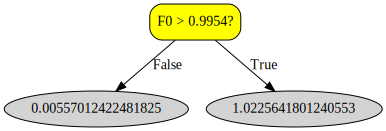

In [17]:
regressor = TreeRegressor(max_depth=1)
regressor.fit(Xtrain, Ytrain)
regressor.draw_tree() #It works for this case TODO: prediction should be rounded

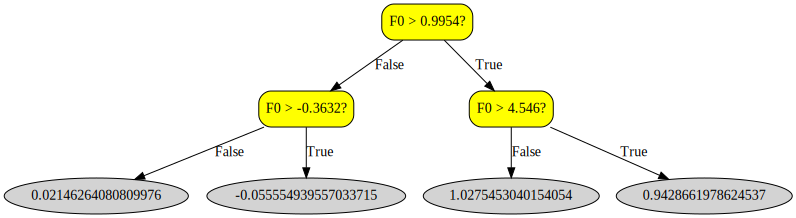

In [18]:
#Trying larger values of depth
regressor = TreeRegressor(max_depth=2)
regressor.fit(Xtrain, Ytrain)
Yguess = regressor.predict(Xtest)
regressor.draw_tree()

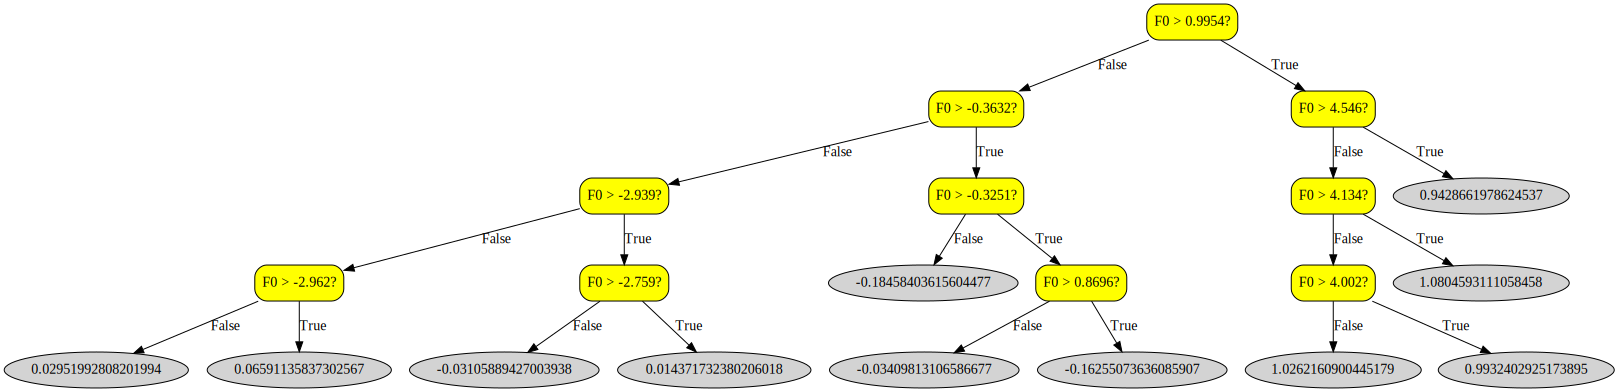

In [19]:
#Trying larger values of depth
regressor = TreeRegressor(max_depth=4)
regressor.fit(Xtrain, Ytrain)
Yguess = regressor.predict(Xtest)
regressor.draw_tree()

In [20]:
from sklearn.metrics import mean_squared_error as mse
tree_reg = TreeRegressor(max_depth=7)
X = alldata_shuffled.drop('price_doc', axis=1)
Y = alldata_shuffled['price_doc'].apply(np.log)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)
tree_reg.fit(Xtrain, Ytrain)
Ypredict = tree_reg.predict(Xtest)
score = mse(Ytest, Ypredict) #0.34

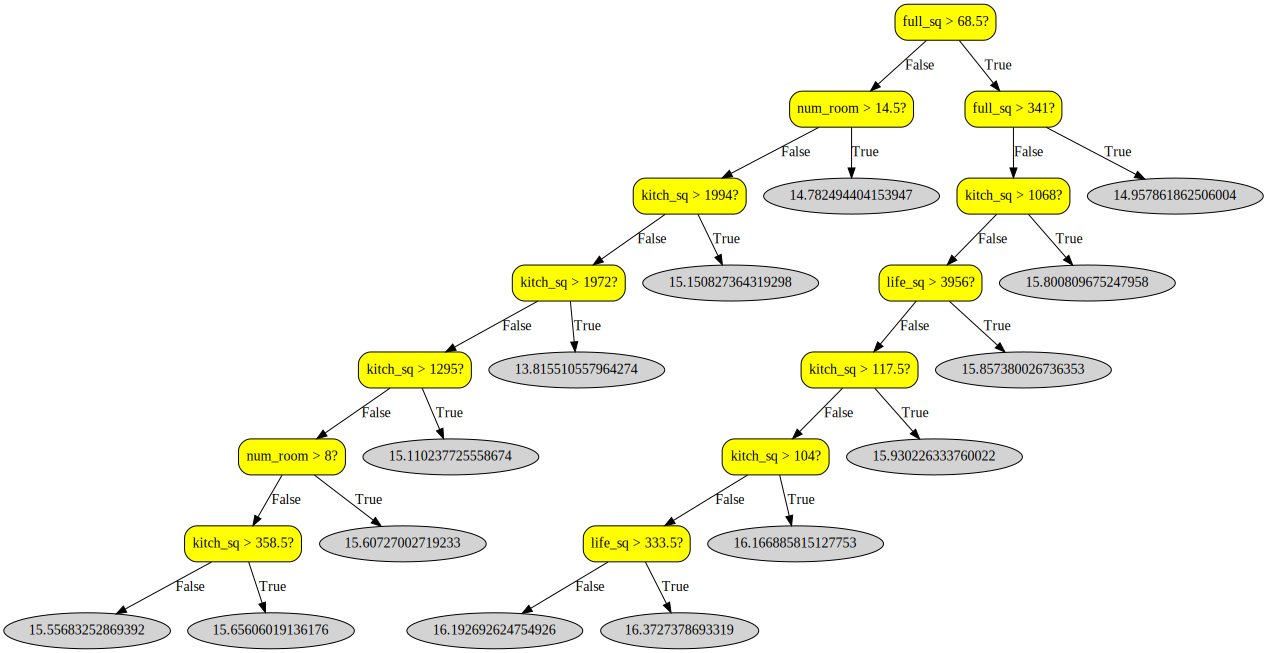

In [21]:
tree_reg.draw_tree()

In [45]:
training_scores = []
test_scores = []
for depth in range(30):
    tree_reg = TreeRegressor(max_depth=depth, variance_threshold=0.000001)
    tree_reg.fit(Xtrain, Ytrain)
    tree_reg.draw_tree()
    Ypredict_test = tree_reg.predict(Xtest)
    Ypredict_train = tree_reg.predict(Xtrain)
    training_scores.append(mse(Ytrain, Ypredict_train))
    test_scores.append(mse(Ytest, Ypredict_test))

11621    14.782494
Name: price_doc, dtype: float64
27793    14.957862
Name: price_doc, dtype: float64
21415    15.150827
Name: price_doc, dtype: float64
11621    14.782494
Name: price_doc, dtype: float64
10368    15.80081
Name: price_doc, dtype: float64
27793    14.957862
Name: price_doc, dtype: float64
28734    13.815511
Name: price_doc, dtype: float64
21415    15.150827
Name: price_doc, dtype: float64
11621    14.782494
Name: price_doc, dtype: float64
13546    15.85738
Name: price_doc, dtype: float64
10368    15.80081
Name: price_doc, dtype: float64
27793    14.957862
Name: price_doc, dtype: float64
13117    15.110238
Name: price_doc, dtype: float64
28734    13.815511
Name: price_doc, dtype: float64
21415    15.150827
Name: price_doc, dtype: float64
11621    14.782494
Name: price_doc, dtype: float64
8949    15.930226
Name: price_doc, dtype: float64
13546    15.85738
Name: price_doc, dtype: float64
10368    15.80081
Name: price_doc, dtype: float64
27793    14.957862
Name: price_doc, d

In [ ]:
len(Ytrain)

17764    15.60727
Name: price_doc, dtype: float64
13117    15.110238
Name: price_doc, dtype: float64
28734    13.815511
Name: price_doc, dtype: float64
21415    15.150827
Name: price_doc, dtype: float64
11621    14.782494
Name: price_doc, dtype: float64
27996    16.166886
Name: price_doc, dtype: float64
8949    15.930226
Name: price_doc, dtype: float64
13546    15.85738
Name: price_doc, dtype: float64
10368    15.80081
Name: price_doc, dtype: float64
27793    14.957862
Name: price_doc, dtype: float64
0.34134759053359603


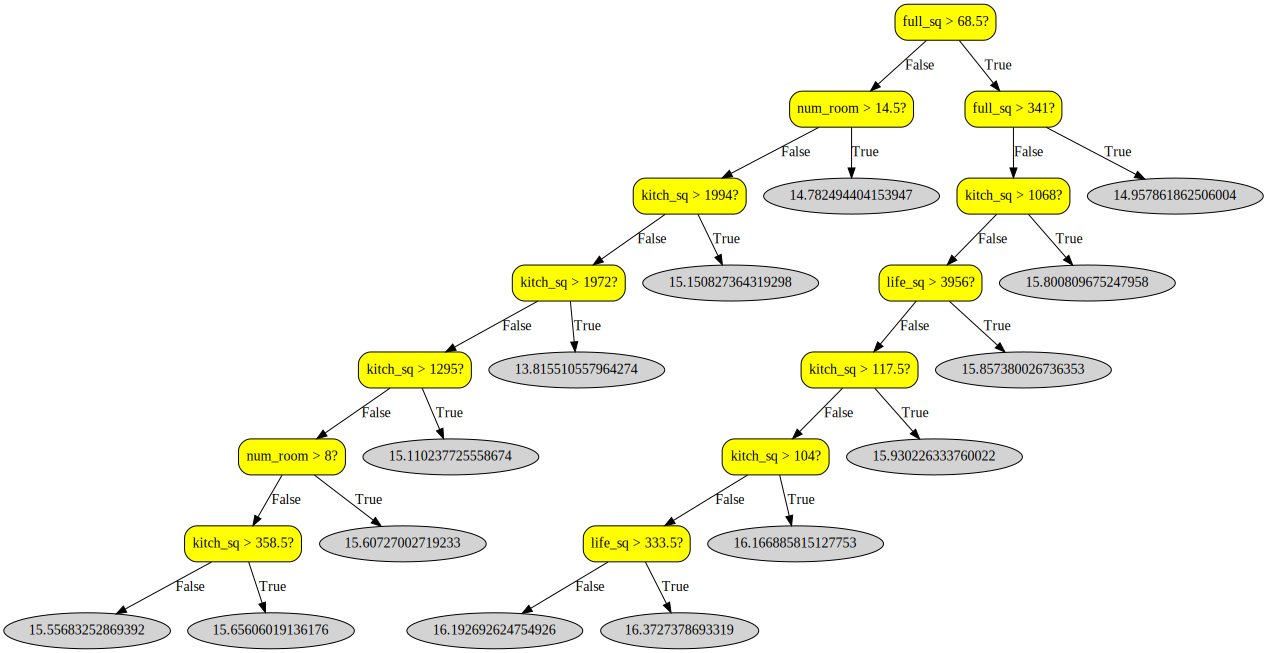

In [41]:
tree_reg = TreeRegressor(max_depth=7, variance_threshold=0.01)
tree_reg.fit(Xtrain, Ytrain)
print(mse(Ytest, tree_reg.predict(Xtest)))
tree_reg.draw_tree()

In [46]:
x_axis = [x for x in range(30)]
pyplot.plot(x_axis, training_scores)
pyplot.plot(x_axis, test_scores)
pyplot.legend(['Training scores', 'Test scores'], loc = 'upper left')
pyplot.show()

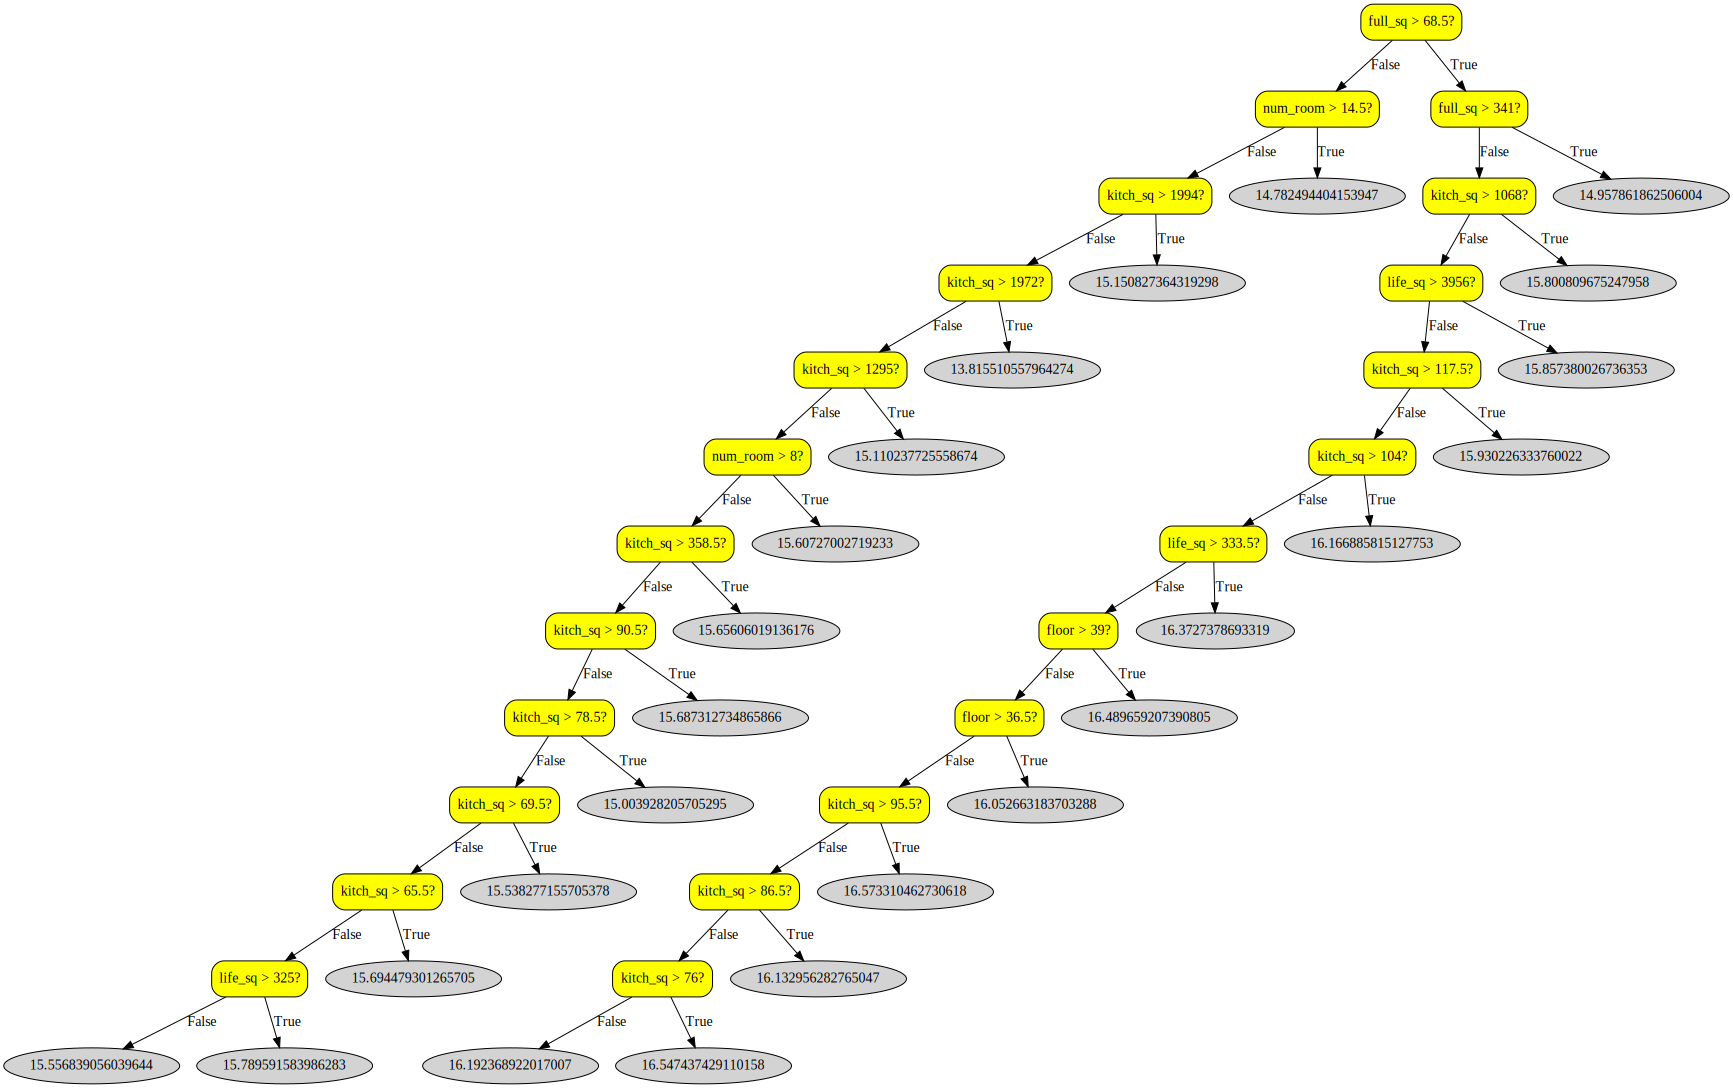

In [24]:
tree_reg.draw_tree()